# Unsupervised Learning with K-Means Notebook - Spotify Data

### About the dataset:

The data for this notebook was collected on April 26th 2018 using the python library [Spotipy](https://spotipy.readthedocs.io/en/latest/) which is utlizing the [official Spotify Web API](https://beta.developer.spotify.com/documentation/web-api/).
The dataset contains a number of audio features for a total of 93690 unique tracks from Spotify. There is a [separate notebook](https://github.com/tgel0/tgel0.github.io/blob/master/Notebooks/SpotifyDataNotebook.ipynb) showing the data collection part.

### About this notebook:

This notebook is divided into the following parts:

#### 1. EDA
Exploring the data with pandas, feature analysis
#### 2. Machine Learning
Preparing the data, clustering with the K-Means algorithm followed by cluster analysis and visualization (with PCA).

### Goal of the notebook:

The goal is to explore the data collected from the Spotify API and experiment with unsupervised machine learning algorythms using the python library scikit-learn.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. EDA

Exploratory data analysis.

In [2]:
# reading the .csv file into a datframe

df = pd.read_csv('SpotifyAudioFeatures260042018.csv',index_col=0)
df.head()

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Drake,97,2XW4DbS6NddZxRPm5rMCeY,God's Plan,0.02440,0.753,198960,0.454,0.000056,7,0.498,-9.488,1,0.0963,77.170,4,0.344
1,Drake,99,1cTZMwcBJT0Ka3UJPXOeeN,Nice For What,0.09340,0.567,210926,0.913,0.000124,8,0.114,-6.471,1,0.0736,93.350,4,0.792
2,Post Malone,95,65NwOZqoXny4JxqAPlfxRF,Psycho (feat. Ty Dolla $ign),0.56600,0.740,220880,0.558,0.000000,8,0.112,-8.115,1,0.1020,140.057,4,0.421
3,BlocBoy JB,98,4qKcDkK6siZ7Jp1Jb4m0aL,Look Alive (feat. Drake),0.00104,0.922,181263,0.581,0.000059,10,0.105,-7.495,1,0.2700,140.022,4,0.595
4,XXXTENTACION,97,3ee8Jmje8o58CHK66QrVC2,SAD!,0.25800,0.740,166606,0.613,0.003720,8,0.123,-4.880,1,0.1450,75.023,4,0.473


In [3]:
df.shape

(93690, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93690 entries, 0 to 93689
Data columns (total 17 columns):
artist_name         93690 non-null object
popularity          93690 non-null int64
track_id            93690 non-null object
track_name          93690 non-null object
acousticness        93690 non-null float64
danceability        93690 non-null float64
duration_ms         93690 non-null int64
energy              93690 non-null float64
instrumentalness    93690 non-null float64
key                 93690 non-null int64
liveness            93690 non-null float64
loudness            93690 non-null float64
mode                93690 non-null int64
speechiness         93690 non-null float64
tempo               93690 non-null float64
time_signature      93690 non-null int64
valence             93690 non-null float64
dtypes: float64(9), int64(5), object(3)
memory usage: 12.9+ MB


In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,93690.000000,93690.000000,93690.000000,9.369000e+04,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000,93690.000000
mean,30.482463,0.324905,0.586431,2.136447e+05,0.580781,0.230713,5.242758,0.192953,-9.779976,0.604141,0.112959,119.995312,3.886914,0.438479
std,13.500031,0.334599,0.187380,1.260517e+05,0.253634,0.362988,3.605844,0.165570,6.331046,0.489037,0.125132,30.133499,0.503241,0.260862
min,0.000000,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.028300,0.470000,1.662170e+05,0.415000,0.000000,2.000000,0.097200,-11.626000,0.000000,0.038800,97.000000,4.000000,0.222000
50%,29.000000,0.188000,0.611000,2.028655e+05,0.611000,0.000214,5.000000,0.123000,-7.982000,1.000000,0.056400,120.043000,4.000000,0.419000
75%,38.000000,0.591000,0.728000,2.410832e+05,0.781000,0.498000,8.000000,0.233000,-5.729000,1.000000,0.131000,139.914000,4.000000,0.637000
max,100.000000,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.996000,1.806000,1.000000,0.964000,249.983000,5.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69dcaf6940>,
      dtype=object)

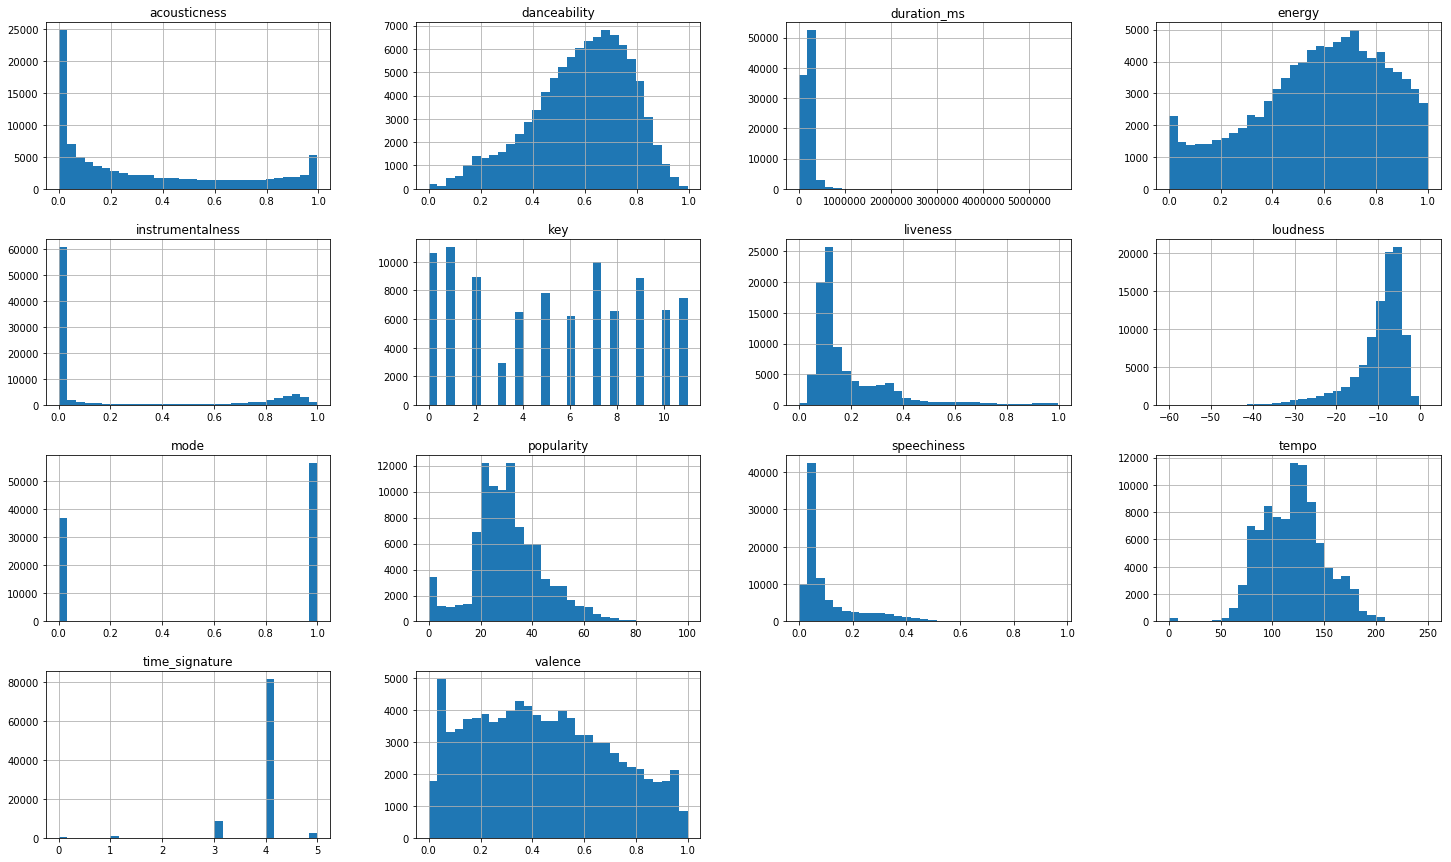

In [6]:
df.hist(bins=30, figsize=(25,15))

### Feature analysis

Quick overview of each feature.

#### Duration_ms
Description from the [official API docs](https://beta.developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/): "The duration of the track in milliseconds."

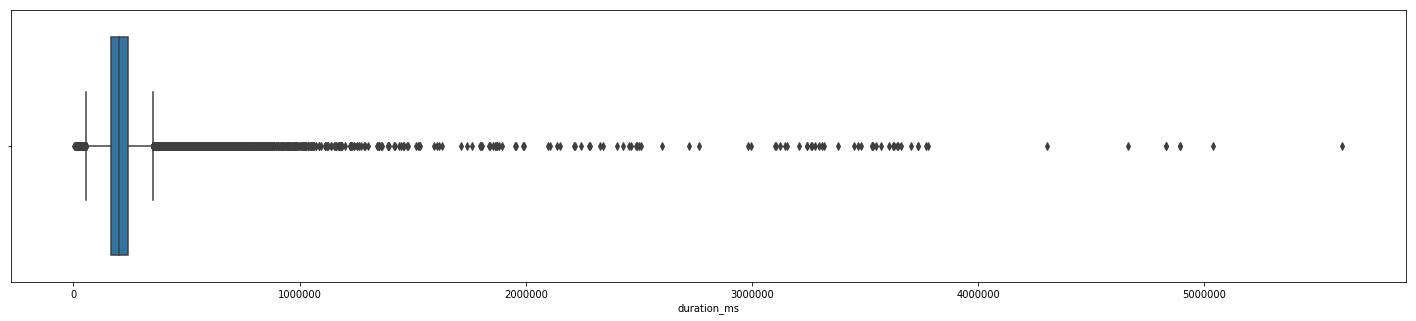

In [7]:
plt.figure(figsize=(25,5))
sns.boxplot(x='duration_ms', data=df)

Boxplot and also the .describe() method earlier shows clearly that there are some outliers here.

In [8]:
# showing some of the longer tracks

df.loc[df['duration_ms'] > 1500000,['artist_name','track_name','duration_ms']].head()

,artist_name,track_name,duration_ms
5719,Excision,Lost Lands 2017 Mix,4830606
6377,Franz Liszt,"Sonata in B Minor, S. 178",1839520
19106,Gustav Mahler,"Symphony No. 6 in A Minor ""Tragic"": IV. Finale...",1525987
28928,Monstercat,#194 - Monstercat: Call of the Wild (Hosted by...,3627887
31420,Gentle Whispering,Fluffy Sleepy Whispers,2097245


Seems to be mostly DJ mixes and classical music symphonies.

Similarly there are some very short tracks as well (interludes etc.):

In [9]:
df.loc[df['duration_ms'] < 60000,['artist_name','track_name','duration_ms']].head()

,artist_name,track_name,duration_ms
199,XXXTENTACION,love yourself (interlude),48423
669,Breaking Benjamin,Lyra,29747
906,Tinashe,Go Easy On Me (Interlude),31040
1214,Waka Flocka Flame,Interlude (feat. Slim Dunkin),46560
1252,Waka Flocka Flame,Tune-Up Man Skit (feat. Slim Dunkin),14616


### Function for example tracks

Since a lot of features are provided in this 0 to 1 confidence measure format I will create 2 functions to get some example tracks for those feature more easily.

#### Acousticness

Description from the official API docs: "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."


In [10]:
def high_confidence_examples (feature):
    """Return 5 example tracks with a very strong confidence for the feature in question (> 0.95), sorted by popularity """
    
    examples = df.loc[df[feature] > 0.95,['artist_name','track_name',feature,'popularity']].sort_values('popularity', ascending=False).head()
    
    return examples

def low_confidence_examples (feature):
    """Return 5 example tracks with a very low confidence for the feature in question (< 0.05), sorted by popularity """
    
    examples = df.loc[df[feature] < 0.05,['artist_name','track_name',feature,'popularity']].sort_values('popularity', ascending=False).head()
    
    return examples

In [11]:
# using the newly created function for the 'acousticness' feature

high_confidence_examples('acousticness')

,artist_name,track_name,acousticness,popularity
94,Bad Bunny,Amorfoda,0.983,93
141,XXXTENTACION,before I close my eyes,0.976,80
473,Strange Imagining,Magnetic,0.991,72
869,Arden Forest,Coral Red,0.993,70
805,The Daydream Club,For the Lost Ones,0.994,70


In [12]:
low_confidence_examples('acousticness')

,artist_name,track_name,acousticness,popularity
40,Nicky Jam,X,0.03640,99
3,BlocBoy JB,Look Alive (feat. Drake),0.00104,98
0,Drake,God's Plan,0.02440,97
34,Calvin Harris,One Kiss (with Dua Lipa),0.03700,96
49,David Guetta,Like I Do,0.00664,94


#### Danceability
Description from the official API docs: "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."

In [13]:
high_confidence_examples('danceability')

,artist_name,track_name,danceability,popularity
54,Cardi B,Drip (feat. Migos),0.968,86
88,Ty Dolla $ign,Pineapple (feat. Gucci Mane & Quavo),0.964,83
204,Lil Yachty,BABY DADDY,0.972,76
230,Slim Jxmmi,Chanel (feat. Swae Lee & Pharrell),0.980,76
14217,Mc Neguinho do ITR,Popotão Grandão,0.974,73


In [14]:
low_confidence_examples('danceability')

,artist_name,track_name,danceability,popularity
929,Max Richter,A Woman Alone,0.0,63
4961,Arx,Cabin Pressure,0.0,52
5550,Arx,Tranquil White Noise,0.0,51
20882,The White Noisy,Old Air Conditioner,0.0,51
15611,Neighborhood Crook,Forgien Wit Mans,0.0,43


#### Energy
"Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."

In [15]:
high_confidence_examples('energy')

,artist_name,track_name,energy,popularity
369,j-hope,Daydream (백일몽),0.961,76
13682,IZA,Ginga (Participação especial de Rincon Sapiência),0.972,74
39119,Katja Krasavice,Dicke Lippen,0.967,70
750,Yellow Claw,Beastmode,0.973,70
1304,Steve Aoki,Mayhem,0.964,69


In [16]:
low_confidence_examples('energy')

,artist_name,track_name,energy,popularity
525,Astron,In the Clouds,0.0466,70
869,Arden Forest,Coral Red,0.0128,70
758,Per Magnusson,Erin's Waltz,0.0457,68
790,Belle Margaux,Theme from the Steps of Life,0.0049,67
1276,Tomasz Kraal,Luna From Soyuz,0.0217,67


####  Instrumentalness
"Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

In [17]:
high_confidence_examples('instrumentalness')

,artist_name,track_name,instrumentalness,popularity
580,Morongo,Anasazi,0.969,70
805,The Daydream Club,For the Lost Ones,0.953,70
758,Per Magnusson,Erin's Waltz,0.953,68
980,Elliot Ziegler,Lyon,0.958,68
790,Belle Margaux,Theme from the Steps of Life,0.957,67


In [18]:
low_confidence_examples('instrumentalness')

,artist_name,track_name,instrumentalness,popularity
17,Marshmello,FRIENDS,0.000000,100
40,Nicky Jam,X,0.001080,99
1,Drake,Nice For What,0.000124,99
3,BlocBoy JB,Look Alive (feat. Drake),0.000059,98
5,Lil Dicky,Freaky Friday (feat. Chris Brown),0.000000,98


#### Liveness
"Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."

In [19]:
high_confidence_examples('liveness')

,artist_name,track_name,liveness,popularity
29541,Ferrugem,Pra você acreditar - Ao vivo,0.965,68
31902,Ronnie Flex,WOW,0.958,64
52697,Ferrugem,Sinto sua falta - Ao vivo,0.961,62
48899,Ferrugem,O meu coração tem medo - Ao vivo,0.975,62
60812,Ferrugem,Minha namorada - Ao vivo,0.975,60


In [20]:
low_confidence_examples('liveness')

,artist_name,track_name,liveness,popularity
154,Meghan Trainor,No Excuses,0.0417,83
7006,MC Loma e As Gêmeas Lacração,Envolvimento,0.0349,77
359,R3HAB,The Wave,0.0420,77
206,Troye Sivan,My My My!,0.0440,76
191,Bazzi,Myself,0.0338,76


#### Speechiness
"Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

In [21]:
high_confidence_examples('speechiness')

,artist_name,track_name,speechiness,popularity
85859,JóiPé,Grunnar Týpur - Interlude,0.951,46
14017,PaperMakingBoys,Loyal She A Keeper,0.954,43
16831,Andrew W.K.,The Feeling of Being Alive,0.951,40
63202,Santo Subito,Sugar Baby (Interlude),0.964,39
27817,Andrew W.K.,Confusion and Clarity,0.952,35


In [22]:
low_confidence_examples('speechiness')

,artist_name,track_name,speechiness,popularity
6,Khalid,Love Lies (with Normani),0.0449,98
8,The Weeknd,Call Out My Name,0.0369,97
46,Rudimental,"These Days (feat. Jess Glynne, Macklemore & Da...",0.0474,97
39,Camila Cabello,Havana,0.0300,96
49,David Guetta,Like I Do,0.0377,94


#### Valence
"	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

In [23]:
high_confidence_examples('valence')

,artist_name,track_name,valence,popularity
117,Logic,Indica Badu,0.970,81
7006,MC Loma e As Gêmeas Lacração,Envolvimento,0.965,77
19406,MC Loma e As Gêmeas Lacração,Treme Treme,0.968,71
23478,MC Loma e As Gêmeas Lacração,Paralisa,0.971,70
1002,Joss Favela,Me Hubieras Dicho,0.963,68


In [24]:
low_confidence_examples('valence')

,artist_name,track_name,valence,popularity
148,Rae Sremmurd,CLOSE (feat. Travis Scott),0.0395,77
420,Tank,When We (Remix) [feat. Ty Dolla $ign and Trey ...,0.0398,71
525,Astron,In the Clouds,0.0384,70
580,Morongo,Anasazi,0.0372,70
26063,Ufo361,Kontostand,0.0381,70


#### Key
"The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on."

In [25]:
df.loc[df['key'] > 10,['artist_name','track_name','key']].head()

,artist_name,track_name,key
18,Rich The Kid,Plug Walk,11
30,XXXTENTACION,changes,11
48,Dan + Shay,Tequila,11
54,Cardi B,Drip (feat. Migos),11
56,The Weeknd,Privilege,11


#### Loudness
"The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db."

In [26]:
df.loc[df['loudness'] > 0,['artist_name','track_name','loudness']].head()

,artist_name,track_name,loudness
9037,Duki,Rockstar,0.642
9298,Borgore,Reasons,0.038
15830,SVDDEN DEATH,Angel Style,0.034
20412,CG5,No More Cake,0.476
21728,"Steve Lieberman, The Gangsta Rabbi",The Diarrhea Song,1.750


#### Mode
"Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.."

In [27]:
df.loc[df['mode'] == 0,['artist_name','track_name','mode']].head()

,artist_name,track_name,mode
10,Kendrick Lamar,All The Stars (with SZA),0
11,Cardi B,I Like It,0
13,XXXTENTACION,Moonlight,0
14,Rae Sremmurd,Powerglide (feat. Juicy J),0
15,Post Malone,rockstar,0


#### Popularity
"The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time."

In [28]:
df.loc[:,['artist_name','track_name','popularity']].sort_values('popularity', ascending=False).head()

,artist_name,track_name,popularity
17,Marshmello,FRIENDS,100
40,Nicky Jam,X,99
1,Drake,Nice For What,99
3,BlocBoy JB,Look Alive (feat. Drake),98
5,Lil Dicky,Freaky Friday (feat. Chris Brown),98


In [29]:
df.loc[:,['artist_name','track_name','popularity']].sort_values('popularity').head()

,artist_name,track_name,popularity
88491,Stealth,I Don't Need Your Love - Acoustic,0
32857,Image Sounds,The Clubwork,0
32858,Image Sounds,Where Am I,0
32859,Image Sounds,Winter Sadness 2,0
32860,Image Sounds,Blaster,0


#### Tempo
"The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."

In [30]:
df.loc[df['tempo'] == 128,['artist_name','track_name','tempo','popularity']].sort_values('popularity', ascending=False).head()

,artist_name,track_name,tempo,popularity
36155,Christian Smith,Metamorphosis,128.0,44
40539,Chris Lorenzo,Mind Control (Never Say Never),128.0,39
22556,Matt Fax,Storm,128.0,38
19166,Ozone,Ulala,128.0,36
31597,Sunny Lax,Obsydian,128.0,36


#### Time signature
"An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)."

In [31]:
df.loc[df['time_signature'] == 4,['artist_name','track_name','time_signature','popularity']].sort_values('popularity', ascending=False).head()

,artist_name,track_name,time_signature,popularity
17,Marshmello,FRIENDS,4,100
1,Drake,Nice For What,4,99
40,Nicky Jam,X,4,99
3,BlocBoy JB,Look Alive (feat. Drake),4,98
5,Lil Dicky,Freaky Friday (feat. Chris Brown),4,98


## 2. Machine Learning

### Preprocessing

Some steps needed before starting with the unsupervised learning:

- dropping unnecessary/ unwanted features - non-numeric features need to be dropped since K-Means clustering depends on numeric data to measure variance. Additionally, I will drop the popularity, mode and key features since I don't want the clustering based on those.
- standardization - some features have extremely high variance such as duration (ms). Without standardization, features with high variance will be the dominant driver of the clustering algorithm, which is not desired
- train/test data split - not needed here since the goal is to identify clusters of unlabeled data. In this sense, the K-Means clustering can be seen as an (advanced) part of the EDA process rather than an actual prediction algorithm.

In [60]:
# dropping columns

columns_to_drop = ['track_id','artist_name','track_name','popularity','mode','key']

df_pred = df.drop(columns_to_drop, axis=1)

print('Columns left are:', df_pred.columns)

Columns left are: Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')


In [61]:
# importing StandardScaler

from sklearn.preprocessing import StandardScaler

In [62]:
# running the standardization on the dataframe

scaler = StandardScaler().fit(df_pred)
standardized = scaler.transform(df_pred)
df_standardized = pd.DataFrame(standardized, columns = df_pred.columns)

In [63]:
# checking the statistics of the standardized dataframe

df_standardized.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04,9.369000e+04
mean,-6.188525e-17,-2.900113e-16,7.280617e-18,-1.410620e-16,4.914417e-17,-1.818638e-16,7.341289e-17,-2.487544e-17,-2.555800e-16,1.823188e-16,2.878877e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-9.710347e-01,-3.129659e+00,-1.669496e+00,-2.289849e+00,-6.355966e-01,-1.165391e+00,-7.932385e+00,-9.027215e-01,-3.982145e+00,-7.723808e+00,-1.680896e+00
25%,-8.864554e-01,-6.213676e-01,-3.762576e-01,-6.536245e-01,-6.355966e-01,-5.783252e-01,-2.915844e-01,-5.926481e-01,-7.631187e-01,2.247161e-01,-8.298659e-01
50%,-4.091651e-01,1.311197e-01,-8.551419e-02,1.191467e-01,-6.350070e-01,-4.224991e-01,2.839950e-01,-4.519963e-01,1.582553e-03,2.247161e-01,-7.467269e-02
75%,7.952683e-01,7.555241e-01,2.176785e-01,7.894075e-01,7.363575e-01,2.418756e-01,6.398623e-01,1.441757e-01,6.610183e-01,2.247161e-01,7.610234e-01
max,2.005679e+00,2.185784e+00,4.281104e+01,1.652861e+00,2.119331e+00,4.850220e+00,1.830035e+00,6.801164e+00,4.313750e+00,2.211847e+00,2.152572e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69cbd5c358>,
      dtype=object)

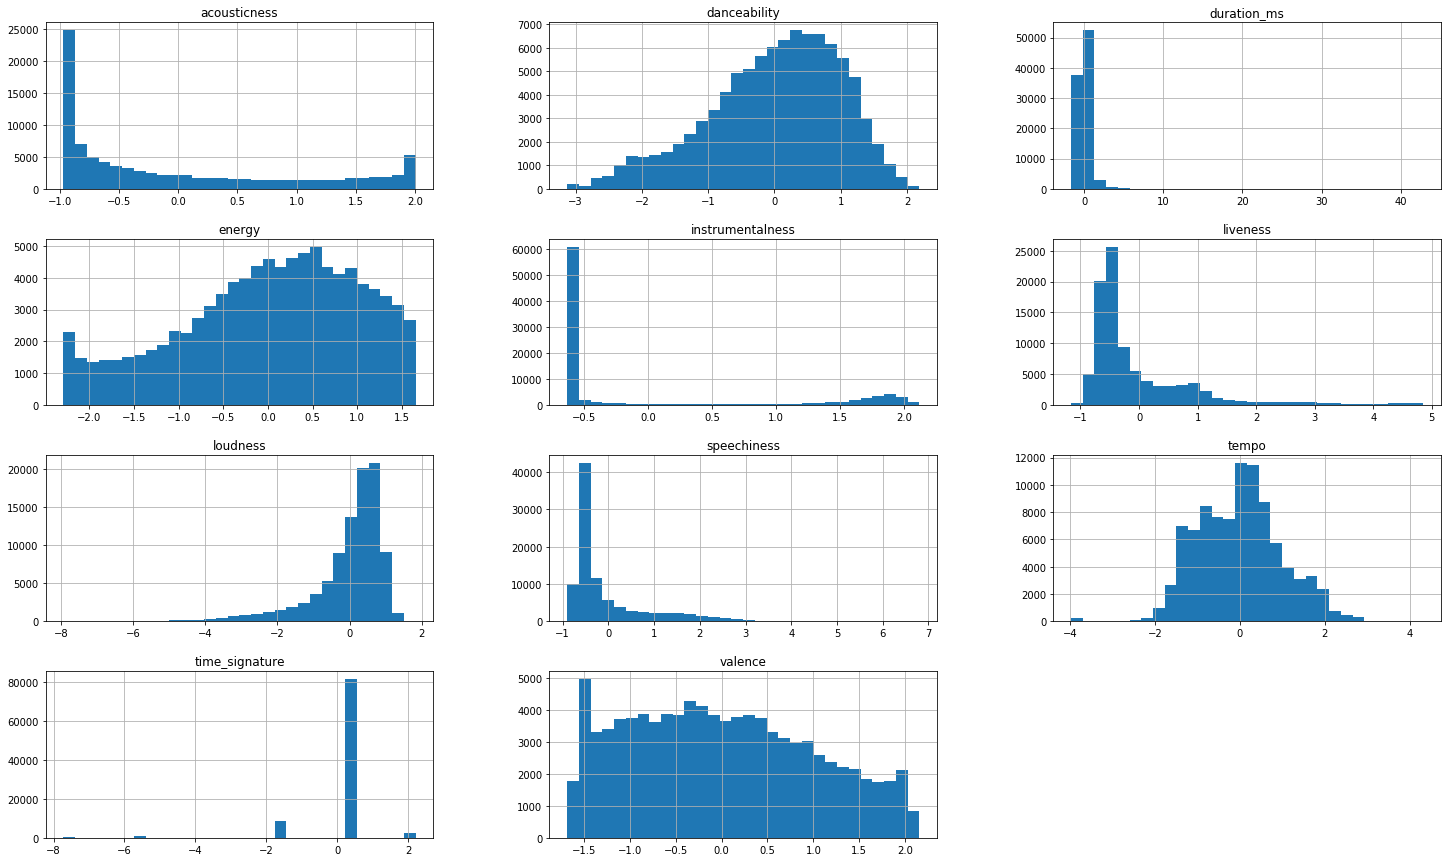

In [64]:
# histograms

df_standardized.hist(bins=30, figsize=(25,15))

### K-Means clustering

According to the [official scikit-learn docs](http://scikit-learn.org/stable/modules/clustering.html#k-means) "K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields."

Using the elbow analysis as described in [this blog post](http://www.awesomestats.in/python-cluster-validation/#Elbow-Analysis) I will determine the optimal number of clusters.

In [65]:
# importing KMeans from the SKL library and timeit for measuring the time needed to run the algorithm

from sklearn.cluster import KMeans
import timeit

In [66]:
# starting the timer

start = timeit.default_timer()


# defining the range and empty list for the error value

cluster_range = range (1, 15)
cluster_errors = []


# the function for defining number of clusters

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(df_standardized)
  cluster_errors.append(clusters.inertia_)


# stopping the timer and printing the time

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 123.47660527900734


In [67]:
# creating a dataframe from the error values computed

df_elbow_analysis = pd.DataFrame( { "number of clusters":cluster_range, "cluster errors": cluster_errors } )

In [68]:
df_elbow_analysis

,cluster errors,number of clusters
0,1.030590e+06,1
1,8.242344e+05,2
2,7.591772e+05,3
3,7.057600e+05,4
4,6.627892e+05,5
5,6.220138e+05,6
6,5.810367e+05,7
7,5.426624e+05,8
8,5.117750e+05,9
9,4.928062e+05,10


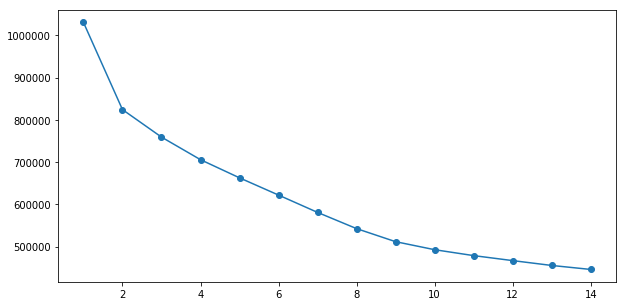

In [69]:
# plotting the dataframe

plt.figure(figsize=(10,5))
plt.plot(df_elbow_analysis['number of clusters'], df_elbow_analysis['cluster errors'], marker = "o" )

It appears that the 2nd cluster adds value significantly while the 3rd one (and the following) not that much.

Based on the data and the elbow analyis I will go with 3 clusters.

In [70]:
# defining KMeans with number of clusters

k_means = KMeans(n_clusters=3)

In [71]:
# timer

start = timeit.default_timer()


# fitting the KMeans algorithm

k_means.fit(df_standardized)


stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 2.9181899880059063


In [72]:
# predicting clusters

y_pred = k_means.predict(df_standardized)

In [73]:
# storing the results in a new dataframe and merging with the original dataframe.

pred = pd.DataFrame(y_pred)
pred.columns = ['Clusters']

df_with_clusters = pd.concat([df,pred], axis = 1)

In [74]:
# printing the shape of each cluster.

for i in range(0,3):
    print('Shape of cluster ', i, ":", df_with_clusters.loc[df_with_clusters['Clusters'] == i].shape)

Shape of cluster  0 : (15845, 18)
Shape of cluster  1 : (58533, 18)
Shape of cluster  2 : (19312, 18)


### Analysis of each cluster

In this part I will take a closer look at the individual clusters and explore what features have been used by the K-Means algorithm for the clustering.

Again I will write some functions:

### Function for example tracks

Similarly to the earlier function, I will create another one which will return 15 example tracks for the requested cluster.

In [75]:
def cluster_examples(cluster):
    """ Return 15 example tracks from the requested cluster (all features), sorted by popularity"""
    
    examples = df_with_clusters.loc[df_with_clusters['Clusters'] == cluster].sort_values('popularity', ascending=False).head(15)
    
    return examples


### Function for histograms

This function will return histograms with the .hist() method for the requested cluster.

In [76]:
def cluster_hist(cluster):
    """Return histograms for the requested cluster using the .hist() method"""
    
    histograms = df_with_clusters.loc[df_with_clusters['Clusters'] == cluster].hist(bins=30, figsize=(25,15))
    
    return histograms

In [77]:
# using the first function for cluster 0

cluster_examples(0)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
3,BlocBoy JB,98,4qKcDkK6siZ7Jp1Jb4m0aL,Look Alive (feat. Drake),0.001040,0.922,181263,0.581,0.000059,10,0.1050,-7.495,1,0.270,140.022,4,0.595,0
5,Lil Dicky,98,10Igtw8bSDyyFs7KIsKngZ,Freaky Friday (feat. Chris Brown),0.147000,0.755,216632,0.599,0.000000,8,0.1090,-5.042,1,0.224,133.123,4,0.755,0
7,Migos,91,6n4U3TlzUGhdSFbUUhTvLP,Walk It Talk It,0.073900,0.909,276147,0.628,0.000000,2,0.1080,-5.456,1,0.201,145.905,4,0.406,0
12,Migos,89,2UVbBKQOdFAekPTRsnkzcf,Stir Fry,0.002990,0.815,190288,0.816,0.000000,2,0.1590,-5.474,1,0.269,181.967,4,0.498,0
64,Shawn Mendes,89,7wvYmO5QscgIDDT0eNwbYX,Lost In Japan,0.303000,0.726,200133,0.708,0.000000,7,0.3480,-6.908,0,0.356,105.084,4,0.417,0
36,N.E.R.D,89,739vCwA3EpBSkk3uDsI2wB,Lemon - Drake Remix,0.000738,0.777,226107,0.657,0.000003,1,0.0932,-6.434,1,0.237,189.992,4,0.245,0
20,J. Cole,88,2UciqgwVDwro0fev3MFbxJ,ATM,0.115000,0.719,216727,0.497,0.000000,8,0.0898,-7.661,1,0.681,81.651,4,0.345,0
29,Cardi B,88,2Yl4OmDby9iitgNWZPwxkd,Be Careful,0.025600,0.820,210787,0.568,0.000000,6,0.0952,-8.230,0,0.411,152.279,4,0.535,0
21,J. Cole,87,1AT4xjNarTswd0UZ5FlmKF,Motiv8,0.135000,0.869,133922,0.385,0.000000,4,0.0931,-7.801,1,0.297,149.897,4,0.596,0
22,J. Cole,87,6tZ3b7ik1QDXFAZlXib0YZ,Kevin’s Heart,0.482000,0.829,200310,0.527,0.000000,6,0.6310,-6.644,0,0.367,116.078,4,0.473,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69cba60908>,
      dtype=object)

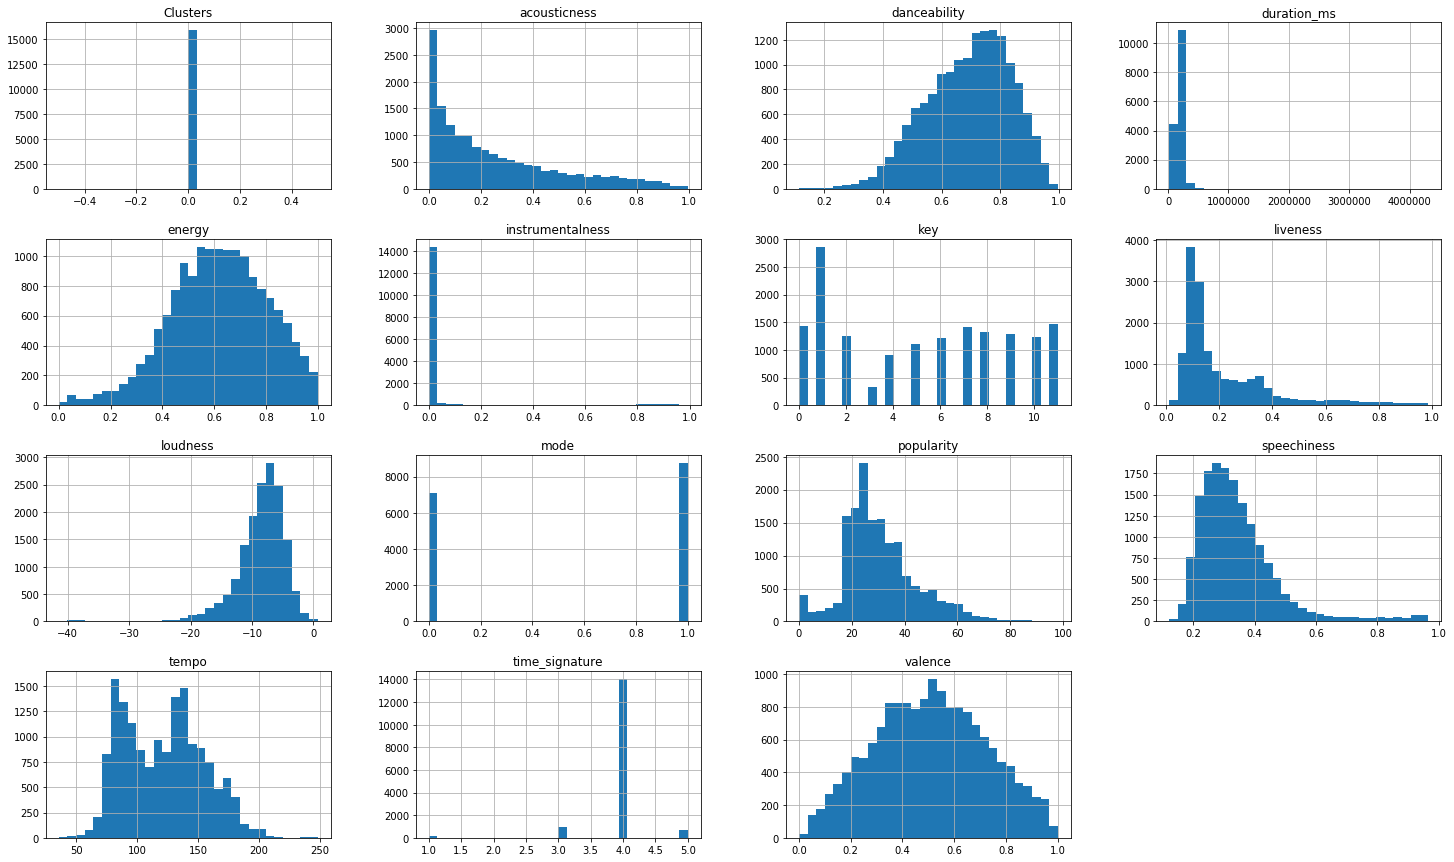

In [78]:
# using the second function for cluster 0

cluster_hist(0)

This cluster tends to have:

- higher confidence values for danceability, energy
- lower for acousticness, instrumentalness, liveness, speechiness

In [79]:
# cluster 1

cluster_examples(1)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
17,Marshmello,100,08bNPGLD8AhKpnnERrAc6G,FRIENDS,0.20500,0.626,202621,0.880,0.000000,9,0.1280,-2.384,0,0.0504,95.079,4,0.534,1
40,Nicky Jam,99,39N9RPD9MRb5WmoLzNzPeA,X,0.03640,0.595,173628,0.773,0.001080,9,0.3340,-4.736,0,0.0549,180.073,4,0.711,1
1,Drake,99,1cTZMwcBJT0Ka3UJPXOeeN,Nice For What,0.09340,0.567,210926,0.913,0.000124,8,0.1140,-6.471,1,0.0736,93.350,4,0.792,1
6,Khalid,98,45Egmo7icyopuzJN0oMEdk,Love Lies (with Normani),0.09560,0.708,201707,0.648,0.000000,6,0.1340,-5.626,1,0.0449,143.955,4,0.338,1
46,Rudimental,97,5CLGzJsGqhCEECcpnFQA8x,"These Days (feat. Jess Glynne, Macklemore & Da...",0.19400,0.653,210773,0.809,0.000000,0,0.1650,-4.057,1,0.0474,92.213,4,0.550,1
0,Drake,97,2XW4DbS6NddZxRPm5rMCeY,God's Plan,0.02440,0.753,198960,0.454,0.000056,7,0.4980,-9.488,1,0.0963,77.170,4,0.344,1
8,The Weeknd,97,4MPTj8lMMvxLwT3EwuXFop,Call Out My Name,0.21100,0.449,228373,0.599,0.000000,1,0.3270,-4.892,1,0.0369,134.144,3,0.165,1
4,XXXTENTACION,97,3ee8Jmje8o58CHK66QrVC2,SAD!,0.25800,0.740,166606,0.613,0.003720,8,0.1230,-4.880,1,0.1450,75.023,4,0.473,1
34,Calvin Harris,96,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),0.03700,0.791,214847,0.862,0.000022,9,0.0814,-3.240,0,0.1100,123.994,4,0.592,1
39,Camila Cabello,96,1rfofaqEpACxVEHIZBJe6W,Havana,0.18400,0.765,217307,0.523,0.000036,2,0.1320,-4.333,1,0.0300,104.988,4,0.394,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69cb60dcf8>,
      dtype=object)

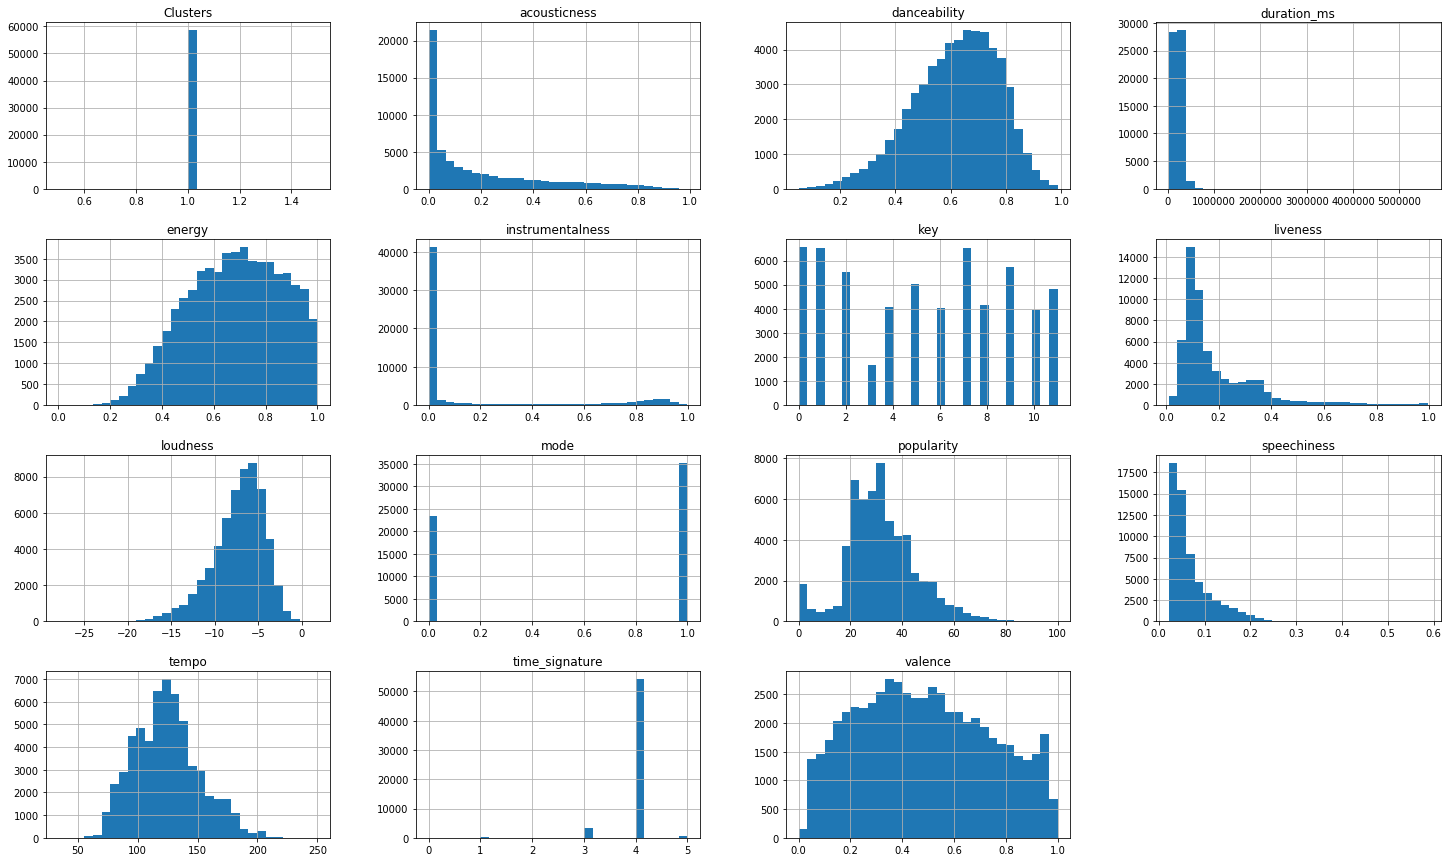

In [80]:
cluster_hist(1)

This cluster tends to have similar features as the previous one. By comparing the histograms, it appears that this cluster has even lower values for speechiness.



In [81]:
cluster_examples(2)

,artist_name,popularity,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Clusters
30,XXXTENTACION,90,7AFASza1mXqntmGtbxXprO,changes,0.883,0.669,121887,0.308,0.000000,11,0.0984,-10.068,1,0.0290,64.934,4,0.5200,2
45,J. Cole,82,52Hq1nvCDDZ17dhgGWLnCI,Intro,0.811,0.512,107161,0.280,0.000075,8,0.0870,-16.708,0,0.0441,111.446,3,0.5450,2
132,XXXTENTACION,81,2oe6dDthgthqUkfL3czpEd,"ALONE, PART 3",0.883,0.610,109986,0.258,0.014500,0,0.1030,-12.758,1,0.0331,127.080,4,0.1640,2
141,XXXTENTACION,80,16x9bQHw8TBNaGDyULvwad,before I close my eyes,0.976,0.356,99658,0.143,0.000019,9,0.1110,-15.148,1,0.0388,75.522,4,0.3340,2
207,Billie Eilish,78,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),0.934,0.351,200186,0.296,0.000000,4,0.0950,-10.109,0,0.0333,115.284,4,0.1200,2
134,Calum Scott,78,69vToJ9BMbbLlFZo7k7A7B,You Are The Reason,0.913,0.341,204326,0.238,0.000000,10,0.1330,-7.578,1,0.0292,171.452,3,0.2290,2
358,Florence + The Machine,77,5mdooqkfMvf7LtIFKReUYg,Sky Full Of Song,0.731,0.533,226160,0.320,0.000017,8,0.1540,-8.819,1,0.0316,98.036,4,0.2910,2
4703,Beret,77,7HNJNqsBZ7qc6UmYEq8bie,Lo siento,0.576,0.419,229939,0.407,0.000000,11,0.1380,-9.011,0,0.0446,79.839,4,0.3090,2
227,Frank Ocean,76,41cpvQ2GyGb2BRdIRSsTqK,Moon River,0.877,0.240,188324,0.116,0.000920,0,0.1000,-13.216,1,0.0329,77.349,3,0.0937,2
425,Camila Cabello,76,7sTtHHrD0zDpmzQzH3zegz,Consequences,0.889,0.455,178467,0.292,0.000000,0,0.1060,-6.792,1,0.0563,84.339,5,0.4300,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69cb217438>,
      dtype=object)

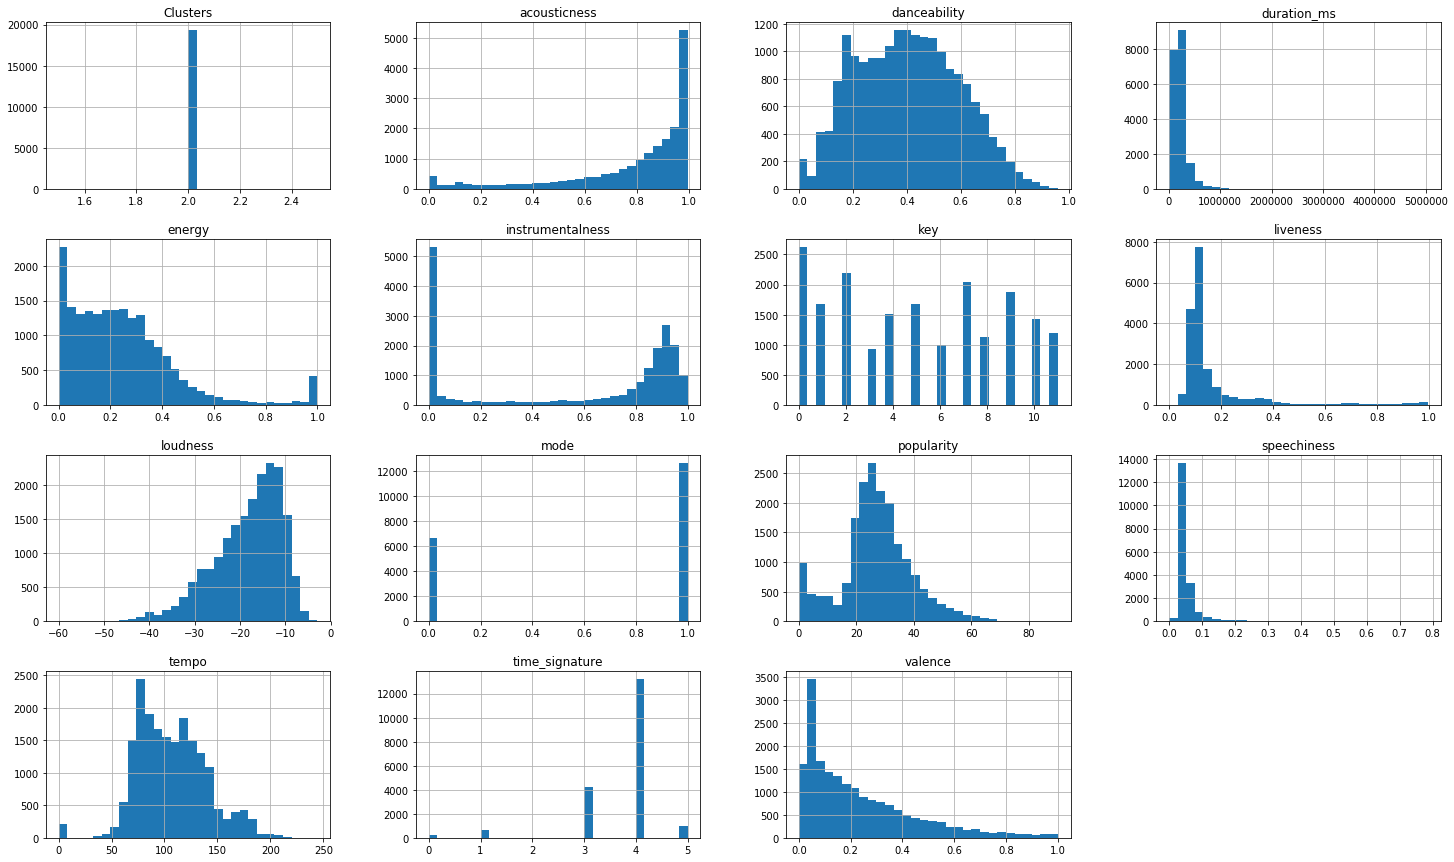

In [82]:
cluster_hist(2)

Cluster 2 seems to be the complete opposite from the first 2 clusters (at least when it comes to some of the key features):

- higher confidence values for acousticness
- lower values for energy, danceability

### Visualization with PCA

In order to visualize the clusters easier I will use Principal component analysis (PCA) to reduce the dimensionality of the data to 2 dimensions/ components.

In [83]:
# importing PCA

from sklearn.decomposition import PCA

In [84]:
# creating the instance with 2 components followed by model fitting.

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_standardized)

Similarly to earlier, I will store the results in a new dataframe and merge with the original dataframe.

In [85]:
pca_fit = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df_with_pca = pd.concat([pca_fit, df_with_clusters], axis = 1)

Now I can visualize the clusters on a scatter plot:

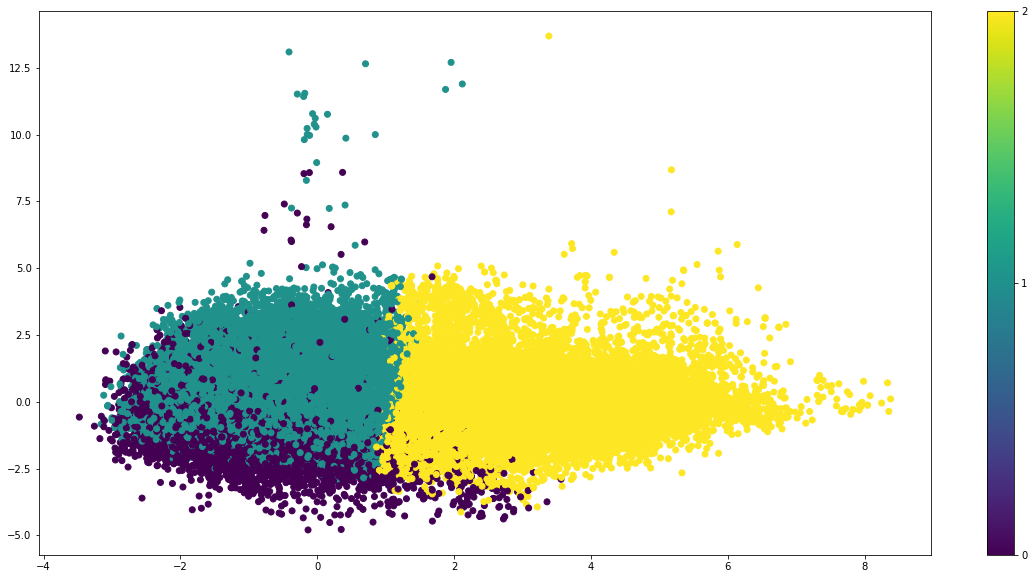

In [86]:
plt.figure(figsize=(20,10))
plt.scatter(x="principal component 1",y="principal component 2",data=df_with_pca,c=df_with_pca['Clusters'])

cbar = plt.colorbar()
cbar.set_ticks(range(3))

#### A few takeaways: 

- K-Means algorithm was able to cluster a large number of tracks relatively fast (the cluster number function took around 2 minutes for 15 iterations on my small 2 GB data server)
- Based on the provided audio features there were only 2 or 3 clear clusters to be identified. This was already visible from the elbow analyis and confirmed later on with the cluster analysis as well as the PCA visualization.
- Determining the correct number of clusters is a big trade off - more clusters reveal more hidden patterns, however it also becomes less clear what are the key differences between them (in the above example, cluster 0 and 1 could even be considered as 1 cluster).